<a href="https://www.kaggle.com/code/krisminvekariya/sf-salaries?scriptVersionId=105270816" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualizatio

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [10]:
df = pd.read_csv('../input/sf-salaries/Salaries.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [11]:
#Find Shape of Our Dataset (Number of Rows And Number of Columns)
dataShape = df.shape
print("shape: ",dataShape)
print("num of rows: ",df.shape[0])
print("num of rows: ",df.shape[1])

shape:  (148654, 13)
num of rows:  148654
num of rows:  13


In [12]:
#Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [13]:
df.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


# #change object datatypes to numeric
Replace 'Not Provided' in EmployeeName,BasePay,Benefits,TotalPay and other Column to NaN

* df['EmployeeName'] = df['EmployeeName'].replace('Not Provided', np.nan)
* 
*         # best way to replace with none in int or float is to typecast as float every string will be converted into NaN
* 
* df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
* df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
* df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
* df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')
* df['TotalPay'] = pd.to_numeric(df['TotalPay'], errors='coerce')
* df['TotalPayBenefits'] = pd.to_numeric(df['TotalPayBenefits'], errors='coerce')

In [14]:
df.loc[df['EmployeeName'] == "Not provided"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN


* **we can remove this missing values by below method also:
* 
* df.drop(df.loc[df['EmployeeName'] == "Not provided"].index, inplace = True)
*
* after this drop rows where BasePay = 0.0
*  df.drop(df.loc[df['BasePay'] == 0].index, inplace = True)
*  
*  after that we can change data type pf basepay by this method
*       df = df.astype({'BasePay':'float','OvertimePay':'float'})
* **

In [15]:
df.loc[df['BasePay'] == 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2896,2897,JOHN PAYNE,MANAGER VII,0.0,0.0,142245.22,NaN,142245.22,142245.22,2011,NaN,San Francisco,NaN
3263,3264,LAWRENCE BADINER,MANAGER VI,0.0,0.0,138191.99,NaN,138191.99,138191.99,2011,NaN,San Francisco,NaN
19058,19059,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.2,64356.03,NaN,65986.23,65986.23,2011,NaN,San Francisco,NaN
20834,20835,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,52820.77,NaN,60636.55,60636.55,2011,NaN,San Francisco,NaN
21658,21659,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0.0,58441.6,NaN,58441.60,58441.60,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72923,72924,Cherise Wong,Special Nurse,0.0,0.0,3.28,0.88,3.28,4.16,2012,NaN,San Francisco,NaN
72924,72925,Donald Clark,Transit Operator,0.0,0.0,1.77,0.14,1.77,1.91,2012,NaN,San Francisco,NaN
122361,122362,Michael V Rolovich,"Captain, Fire Suppression",0.0,0.0,130320.75,0.0,130320.75,130320.75,2014,NaN,San Francisco,PT
127449,127450,Kenneth V Sanchez,Police Officer 3,0.0,0.0,108294.36,0.0,108294.36,108294.36,2014,NaN,San Francisco,PT


In [16]:
#There are some rows with the value 'Not provided', we need to remove all those rows
df = df[df['EmployeeName'] != 'Not provided']
df = df[df['JobTitle'] != 'Not provided']
df = df[df['BasePay'] != 'Not provided']
df.reset_index(inplace = True, drop = True)


In [17]:
#Change Dtypes of Columns
df['BasePay'] = df['BasePay'].astype('float')
df['OvertimePay'] = df['OvertimePay'].astype('float')
df['OtherPay'] = df['OtherPay'].astype('float')

df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148650 entries, 0 to 148649
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  object 
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148650 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 14.7+ MB


# Check Null Values In The Dataset

In [19]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148650
Agency                   0
Status              110531
dtype: int64

# **Drop ID, Notes, Agency, and Status Columns**

In [20]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [21]:
df = df.drop(['Id','Notes','Agency','Status'],axis = 1)

In [22]:
df.head(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011


# **Get Overall Statistics About The Dataframe**

In [23]:
df.describe()

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,66325.448840,5066.059886,3648.767297,74770.333901,93695.075969,2012.522603
std,42764.635495,11454.380559,8056.601866,50516.196009,62792.497391,1.117526
min,-166.010000,-0.010000,-7058.590000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,36169.955000,44073.337500,2012.000000
50%,65007.450000,0.000000,811.270000,71427.240000,92406.020000,2013.000000
75%,94691.050000,4658.175000,4236.065000,105842.960000,132877.992500,2014.000000
max,319275.010000,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


In [24]:
#Check descriptive statistics - Categorical columns
df.describe(exclude= 'number').T

,count,unique,top,freq
EmployeeName,148650,110810,Kevin Lee,13
JobTitle,148650,2158,Transit Operator,7036
Benefits,112491.0,99634.0,0.0,1053.0


# **Find Occurrence of The Employee Names  (Top 5)**

In [25]:
df['EmployeeName'].value_counts().head()

Kevin Lee       13
William Wong    11
Richard Lee     11
Steven Lee      11
KEVIN LEE        9
Name: EmployeeName, dtype: int64

# **Find The Number of Unique Job Titles**

In [26]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [27]:
df['JobTitle'].nunique()

2158

# Top 5 jobs in which there are majority of the people

In [28]:
df['JobTitle'].value_counts().head()

print(f"Top 5 jobs in which there are majority of the people : \n{df['JobTitle'].value_counts().head()}")

Top 5 jobs in which there are majority of the people : 
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64


In [29]:
Top_5_jobs = df['JobTitle'].value_counts().head()
df_Top_5_jobs = pd.DataFrame(Top_5_jobs)
df_Top_5_jobs = df_Top_5_jobs.reset_index()
df_Top_5_jobs.columns = ['Job Title', 'Number of People']

In [30]:
df_Top_5_jobs

,Job Title,Number of People
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


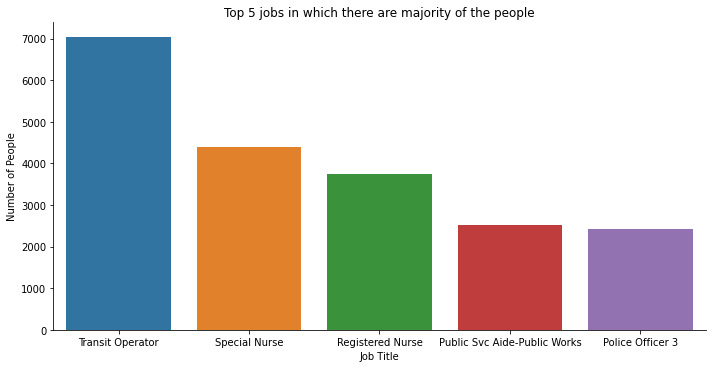

In [31]:
sns.catplot(data= df_Top_5_jobs, x= 'Job Title', y= 'Number of People', kind= 'bar', aspect= 2)
plt.title('Top 5 jobs in which there are majority of the people')
plt.show()

# Total Number of Job Titles Contain Captain

In [32]:
len(df[df['JobTitle'].str.contains('Captain',case = False)])

552

# Display All the Employee Names From Fire Department

In [33]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [34]:
df[df['JobTitle'].str.contains('FIRE DEPARTMENT',case = False)][['EmployeeName', 'JobTitle']]

,EmployeeName,JobTitle
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
10,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
32623,JAMES BARDEN,"BATTALION CHIEF, (FIRE DEPARTMENT)"
36162,Joanne Hayes-White,"Chief, Fire Department"
72926,Joanne M Hayes-White,"Chief, Fire Department"
102303,Robert E Evans,"Captain, (Fire Department)"


# Find Minimum, Maximum, and Average BasePay

In [35]:
min_BasePay = df['BasePay'].min()
max_BasePay = df['BasePay'].max()   
mean_BasePay = df['BasePay'].mean()

print(f"Minimum Basepay : {min_BasePay} \nMaximum Basepay : {max_BasePay} \nAverage Basepay : {mean_BasePay}")

Minimum Basepay : -166.01 
Maximum Basepay : 319275.01 
Average Basepay : 66325.4488404877


# Find Job Title of ALBERT PARDINI

In [36]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [37]:
df[df['EmployeeName'] == 'ALBERT PARDINI'][['EmployeeName','JobTitle']]

,EmployeeName,JobTitle
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)


# How Much ALBERT PARDINI Make (Include Benefits)?

In [38]:
df[df['EmployeeName'] == 'ALBERT PARDINI'][['EmployeeName','TotalPayBenefits']]

,EmployeeName,TotalPayBenefits
2,ALBERT PARDINI,335279.91


# Display Name of The Employee Having The Highest BasePay

In [103]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [39]:
df[df['BasePay'] == df['BasePay'].max()][['EmployeeName','BasePay']]

,EmployeeName,BasePay
72925,Gregory P Suhr,319275.01


# Find Average BasePay of All Employees Per Year

In [40]:
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

# Find Average BasePay of All Employee Per JobTitle

In [41]:
df.groupby('JobTitle')['BasePay'].mean()


JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2158, dtype: float64

# Find Average BasePay of Employees Having Job Title ACCOUNTANT

In [42]:
avgBasepay = df[df['JobTitle'] == 'ACCOUNTANT']['BasePay'].mean()

print(f"Average BasePay of Employees Having Job Title ACCOUNTANT : {avgBasepay}")

Average BasePay of Employees Having Job Title ACCOUNTANT : 46643.172


# Name & Pay of the highest paid employee

In [43]:
df[df['TotalPay'] == df['TotalPay'].max()][['EmployeeName','TotalPay']]

,EmployeeName,TotalPay
0,NATHANIEL FORD,567595.43


# Year-Wise Scatter Plot of Total Pay Benefits vs Total Pay

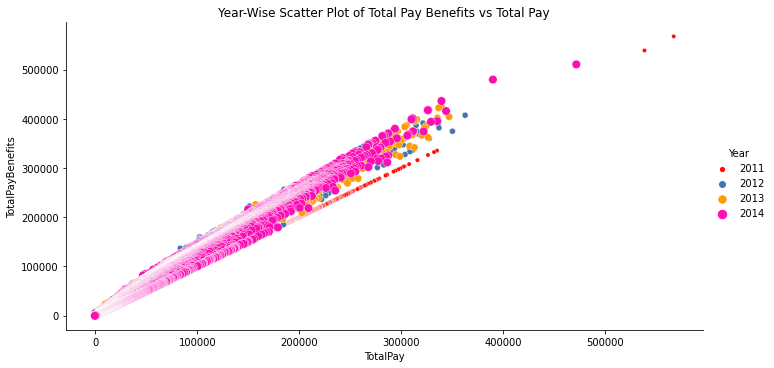

In [44]:
colors = ["#FF0B04", "#4374B3","#FF9B04",'#FA0FB4']
sns.relplot(data= df, x= 'TotalPay', y= 'TotalPayBenefits', hue= 'Year', aspect= 2, palette= colors, size= 'Year')
plt.title('Year-Wise Scatter Plot of Total Pay Benefits vs Total Pay')
plt.show()

Replace 'Not Provided' in EmployeeName' Column to NaN 

ename = df['EmployeeName'] = df['EmployeeName'].replace('Not provided',np.nan)
ename

 Drop The Rows Having 1 Missing Values

df[df.isnull().sum(axis=1)>=5]

#to show missing values in row
df.drop(df[df.isnull().sum(axis=1)>=5].index,axis=0, inplace=True)
df